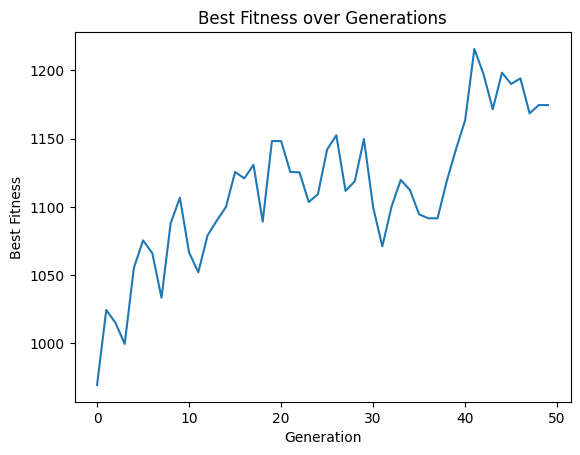

Best solution: [23, 19, 9, 12, 52, 45, 78, 62, 63, 8, 15, 46]


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

# 初始化参数
num_weapons = 12       # 武器种类数量
num_targets = 4        # 目标平台数量

# 武器库存量和成本
max_inventory = [34, 31, 33, 30, 52, 48, 82, 64, 64, 26, 15, 47]  # 各种武器的库存量
weapon_cost = [95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150]  # 武器成本消耗

# 基本毁伤概率矩阵
damage_prob = np.array([
    [0.678, 0.627, 0.486, 0.533],
    [0.607, 0.647, 0.898, 0.798],
    [0.671, 0.583, 0.582, 0.673],
    [0.710, 0.487, 0.736, 0.634],
    [0.567, 0.786, 0.854, 0.653],
    [0.640, 0.695, 0.697, 0.865],
    [0.639, 0.683, 0.562, 0.604],
    [0.789, 0.466, 0.704, 0.650],
    [0.655, 0.677, 0.696, 0.685],
    [0.525, 0.546, 0.582, 0.684],
    [0.745, 0.746, 0.649, 0.632],
    [0.758, 0.527, 0.629, 0.754]
])

# 初始化种群
def initialize_population(size):
    population = []
    for _ in range(size):
        # 生成满足库存约束的解
        individual = [random.randint(0, max_inventory[i]) for i in range(num_weapons)]
        population.append(individual)
    return population

# 适应度函数
def fitness(individual):
    # 计算毁伤效果
    damage = sum(individual[i] * damage_prob[i] for i in range(num_weapons))
    # 加入罚函数处理超过库存的情况
    penalties = sum(max(0, individual[i] - max_inventory[i]) for i in range(num_weapons))
    return sum(damage) - penalties

# 遗传算法操作
def selection(population, fitnesses):
    # 轮盘赌选择
    total_fitness = sum(fitnesses)
    pick = random.uniform(0, total_fitness)
    current = 0
    for individual, fitness in zip(population, fitnesses):
        current += fitness
        if current > pick:
            return individual

def crossover(parent1, parent2):
    # 单点交叉
    point = random.randint(1, num_weapons-1)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

def mutate(individual, mutation_rate=0.05):
    # 随机变异
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(0, max_inventory[i])
    return individual



# 主遗传算法
def genetic_algorithm(population_size=100, generations=50):
    population = initialize_population(population_size)
    best_fitness_history = []
    
    for _ in range(generations):
        new_population = []
        fitnesses = [fitness(ind) for ind in population]
        best_fitness_history.append(max(fitnesses))
        
        for _ in range(population_size // 2):
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])
        population = new_population
    
    # 返回最佳解和适应度历史
    best_individual = max(population, key=fitness)
    return best_individual, best_fitness_history

# 运行算法
best_solution, fitness_history = genetic_algorithm()

# 绘制适应度曲线
plt.plot(fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness over Generations')
plt.show()

print("Best solution:", best_solution)


In [7]:
def generate_solutions_with_llm(meta_prompt, num_solutions=10):
    # 构建提示给LLM的信息
    prompt = f"Given the constraints and objectives described below, generate {num_solutions} potential solutions:\n{meta_prompt}"
    
    # 调用LLM获取解决方案
    text_solutions = call_llm(prompt)
    
    # 解析LLM返回的文本以提取解决方案
    solutions = parse_solutions_from_text(text_solutions)
    
    return solutions

def call_llm(prompt):
    # 这里假设你可以通过API调用LLM或其他方式与模型交互
    # 返回的是模型生成的文本，包含多个解决方案
    return "Solution 1: [description of solution 1]\nSolution 2: [description of solution 2]\n..."

def parse_solutions_from_text(text):
    # 假设解决方案格式为“Solution X: [description]”，需要从文本中解析出来
    solutions = []
    for line in text.split('\n'):
        if line.startswith("Solution"):
            # 提取解决方案的描述或具体参数
            description = line.split(":")[1].strip()
            # 将描述转换为具体的解决方案格式（例如，参数数组）
            solution = description_to_solution(description)
            solutions.append(solution)
    return solutions

def description_to_solution(description):
    # 将描述转换为可用的解决方案格式，这可能需要一些定制的解析逻辑
    # 例如，将文本描述转换为数字数组或参数字典
    return description  # 简化的示例，实际应用中需要具体实现

# 示例使用
meta_prompt = "Here are the constraints and objectives for the problem..."
solutions = generate_solutions_with_llm(meta_prompt)

['[description of solution 1]', '[description of solution 2]']